In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from matplotlib import rc
import seaborn as sns
from scipy import stats

In [4]:
dades_totals_cat = pd.read_excel("dades.xlsx", sheet_name = "Catalonia")
dades_totals_BH = pd.read_excel("dades.xlsx", sheet_name = "BH")
dades_totals_LRI = pd.read_excel("dades.xlsx", sheet_name = "LRI")
dades_totals_rome = pd.read_excel("dades.xlsx", sheet_name = "Rome")
dades_totals_glas = pd.read_excel("dades.xlsx", sheet_name = "Glasgow")
dades_totals_edi = pd.read_excel("dades.xlsx", sheet_name = "Edinburgh")

In [5]:
dades_totals_cat

,Catalonia,2018-2019,2018-2019.1,2018-2019.2,2018-2019.3,2019-2020,2019-2020.1,2019-2020.2,2019-2020.3,2020-2021,...,2021-2022.2,2021-2022.3,2022-2023,2022-2023.1,2022-2023.2,2022-2023.3,2023-2024,2023-2024.1,2023-2024.2,2023-2024.3
0,Attendances to ED,<6m,6-11m,12m-23m,2-5y,<6m,6-11m,12m-23m,2-5y,<6m,...,12m-23m,2-5y,<6m,6-11m,12m-23m,2-5y,<6m,6-11m,12m-23m,2-5y
1,All Diagnoses,56668,59562,114458,276906,46438,44728,84575,204813,37132,...,99461,284279,55721,55185,98344,285683,50552,53664,97547,248107
2,Respiratory Diasgnoses (not including Bronchio...,5580,9026,16911,33264,3779,5925,11681,25859,1984,...,12438,32831,5084,7043,13046,33875,4399,6785,13062,29793
3,Bronchiolitis,6263,2747,1048,261,5612,2403,948,231,2142,...,1307,326,7023,3167,1575,383,3242,2524,1312,296
4,% of Respiratory Diagnoses among all diagnoses,0.098468,0.15154,0.147749,0.120127,0.081377,0.132467,0.138114,0.126257,0.053431,...,0.125054,0.115489,0.09124,0.127625,0.132657,0.118575,0.087019,0.126435,0.133905,0.120081
5,% Bronchiolitis among all diagnoses,0.110521,0.04612,0.009156,0.000943,0.120849,0.053725,0.011209,0.001128,0.057686,...,0.013141,0.001147,0.126039,0.057389,0.016015,0.001341,0.064132,0.047033,0.01345,0.001193
6,Total ED Admissions,<6m,6-11m,12m-23m,2-5y,<6m,6-11m,12m-23m,2-5y,<6m,...,12m-23m,2-5y,<6m,6-11m,12m-23m,2-5y,<6m,6-11m,12m-23m,2-5y
7,All Diagnoses,21558,4046,7540,23444,20771,3088,5503,17851,18862,...,6190,21504,22396,4124,7239,23334,19321,3352,6596,21266
8,Respiratory Diasgnoses (not including Bronchi...,476,748,1368,2286,367,459,976,1750,140,...,1183,2340,527,703,1435,2884,410,577,1316,2464
9,Bronchiolitis,2204,443,209,53,1883,402,225,45,716,...,334,79,2441,614,372,97,952,479,294,43


In [6]:
dades_totals_cat2 = dades_totals_cat.T
dades_totals_cat2.columns = dades_totals_cat2.iloc[0]  # The first row becomes the header
dades_totals_cat2 = dades_totals_cat2.iloc[1:]
dades_totals_cat2.loc[:, 'Season'] = dades_totals_cat2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_cat2.loc[:, 'Season'] = dades_totals_cat2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_BH2 = dades_totals_BH.T
dades_totals_BH2.columns = dades_totals_BH2.iloc[0]  # The first row becomes the header
dades_totals_BH2 = dades_totals_BH2.iloc[1:]
dades_totals_BH2.loc[:, 'Season'] = dades_totals_BH2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_BH2.loc[:, 'Season'] = dades_totals_BH2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_LRI2 = dades_totals_LRI.T
dades_totals_LRI2.columns = dades_totals_LRI2.iloc[0]  # The first row becomes the header
dades_totals_LRI2 = dades_totals_LRI2.iloc[1:]
dades_totals_LRI2.loc[:, 'Season'] = dades_totals_LRI2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_LRI2.loc[:, 'Season'] = dades_totals_LRI2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_rome2 = dades_totals_rome.T
dades_totals_rome2.columns = dades_totals_rome2.iloc[0]  # The first row becomes the header
dades_totals_rome2 = dades_totals_rome2.iloc[1:]
dades_totals_rome2.loc[:, 'Season'] = dades_totals_rome2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_rome2.loc[:, 'Season'] = dades_totals_rome2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_glas2 = dades_totals_glas.T
dades_totals_glas2.columns = dades_totals_glas2.iloc[0]  # The first row becomes the header
dades_totals_glas2 = dades_totals_glas2.iloc[1:]
dades_totals_glas2.loc[:, 'Season'] = dades_totals_glas2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_glas2.loc[:, 'Season'] = dades_totals_glas2.index.str.extract(r'(\d{4}-\d{4})').values

dades_totals_edi2 = dades_totals_edi.T
dades_totals_edi2.columns = dades_totals_edi2.iloc[0]  # The first row becomes the header
dades_totals_edi2 = dades_totals_edi2.iloc[1:]
dades_totals_edi2.loc[:, 'Season'] = dades_totals_edi2.index.str.extract(r'(\d{4}-\d{4})')
dades_totals_edi2.loc[:, 'Season'] = dades_totals_edi2.index.str.extract(r'(\d{4}-\d{4})').values

In [7]:
attendances_ED_cat = dades_totals_cat2.iloc[:,0:6]
attendances_ED_cat['Season'] = dades_totals_cat2['Season']
attendances_ED_cat.reset_index(drop=True, inplace=True)
attendances_ED_BH = dades_totals_BH2.iloc[:,0:6]
attendances_ED_BH['Season'] = dades_totals_BH2['Season']
attendances_ED_BH.reset_index(drop=True, inplace=True)
attendances_ED_LRI = dades_totals_LRI2.iloc[:,0:6]
attendances_ED_LRI['Season'] = dades_totals_LRI2['Season']
attendances_ED_LRI.reset_index(drop=True, inplace=True)
attendances_ED_rome = dades_totals_rome2.iloc[:,0:6]
attendances_ED_rome['Season'] = dades_totals_rome2['Season']
attendances_ED_rome.reset_index(drop=True, inplace=True)
attendances_ED_glas = dades_totals_glas2.iloc[:,0:6]
attendances_ED_glas['Season'] = dades_totals_glas2['Season']
attendances_ED_glas.reset_index(drop=True, inplace=True)
attendances_ED_edi = dades_totals_edi2.iloc[:,0:6]
attendances_ED_edi['Season'] = dades_totals_edi2['Season']
attendances_ED_edi.reset_index(drop=True, inplace=True)

C:\Users\aidap\AppData\Local\Temp\ipykernel_20488\2975670296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_cat['Season'] = dades_totals_cat2['Season']
C:\Users\aidap\AppData\Local\Temp\ipykernel_20488\2975670296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_BH['Season'] = dades_totals_BH2['Season']
C:\Users\aidap\AppData\Local\Temp\ipykernel_20488\2975670296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [8]:
admissions_ED_cat = dades_totals_cat2.iloc[:,6:]
admissions_ED_cat.reset_index(drop=True, inplace=True)
admissions_ED_BH = dades_totals_BH2.iloc[:,6:]
admissions_ED_BH.reset_index(drop=True, inplace=True)
admissions_ED_LRI = dades_totals_LRI2.iloc[:,6:]
admissions_ED_LRI.reset_index(drop=True, inplace=True)
admissions_ED_rome = dades_totals_rome2.iloc[:,6:]
admissions_ED_rome.reset_index(drop=True, inplace=True)
admissions_ED_glas = dades_totals_glas2.iloc[:,6:]
admissions_ED_glas.reset_index(drop=True, inplace=True)
admissions_ED_edi = dades_totals_edi2.iloc[:,6:]
admissions_ED_edi.reset_index(drop=True, inplace=True)

In [9]:
admissions_ED_cat.head()

Catalonia,Total ED Admissions,All Diagnoses,Respiratory Diasgnoses (not including Bronchiolitis),Bronchiolitis,% of Respiratory Diagnoses among all diagnoses,% Bronchiolitis among all diagnoses,Season
0,<6m,21558,476,2204,0.02208,0.102236,2018-2019
1,6-11m,4046,748,443,0.184874,0.109491,2018-2019
2,12m-23m,7540,1368,209,0.181432,0.027719,2018-2019
3,2-5y,23444,2286,53,0.097509,0.002261,2018-2019
4,<6m,20771,367,1883,0.017669,0.090655,2019-2020


In [10]:
attendances_ED_cat.head()

Catalonia,Attendances to ED,All Diagnoses,Respiratory Diasgnoses (not including Bronchiolitis),Bronchiolitis,% of Respiratory Diagnoses among all diagnoses,% Bronchiolitis among all diagnoses,Season
0,<6m,56668,5580,6263,0.098468,0.110521,2018-2019
1,6-11m,59562,9026,2747,0.15154,0.04612,2018-2019
2,12m-23m,114458,16911,1048,0.147749,0.009156,2018-2019
3,2-5y,276906,33264,261,0.120127,0.000943,2018-2019
4,<6m,46438,3779,5612,0.081377,0.120849,2019-2020


In [11]:
# Step 1: Add the "Place" column to each DataFrame
admissions_ED_cat['Place'] = 'Catalonia'
admissions_ED_rome['Place'] = 'Rome'
admissions_ED_BH['Place'] = 'Bristol'  # Replace with the full name if needed
admissions_ED_LRI['Place'] = 'Leicester'  # Replace with the full name if needed
admissions_ED_glas['Place'] = 'Glasgow'
admissions_ED_edi['Place'] = 'Edinburgh'

# Step 2: Concatenate all four DataFrames
admissions_ED = pd.concat([admissions_ED_cat, admissions_ED_rome, admissions_ED_BH, admissions_ED_LRI, admissions_ED_glas, admissions_ED_edi], ignore_index=True)

attendances_ED_cat['Place'] = 'Catalonia'
attendances_ED_rome['Place'] = 'Rome'
attendances_ED_BH['Place'] = 'Bristol'  # Replace with the full name if needed
attendances_ED_LRI['Place'] = 'Leicester'  # Replace with the full name if needed
attendances_ED_glas['Place'] = 'Glasgow'
attendances_ED_edi['Place'] = 'Edinburgh'

# Step 2: Concatenate all four DataFrames
attendances_ED = pd.concat([attendances_ED_cat, attendances_ED_rome, attendances_ED_BH, attendances_ED_LRI, attendances_ED_glas, attendances_ED_edi], ignore_index=True)



C:\Users\aidap\AppData\Local\Temp\ipykernel_20488\2727863535.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_cat['Place'] = 'Catalonia'
C:\Users\aidap\AppData\Local\Temp\ipykernel_20488\2727863535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendances_ED_rome['Place'] = 'Rome'
C:\Users\aidap\AppData\Local\Temp\ipykernel_20488\2727863535.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [12]:
admissions_ED.rename(columns={'Total ED Admissions': 'Age-group'}, inplace=True)
attendances_ED.rename(columns={'Attendances to ED': 'Age-group'}, inplace=True)

In [13]:
admissions_ED

,Age-group,All Diagnoses,Respiratory Diasgnoses (not including Bronchiolitis),Bronchiolitis,% of Respiratory Diagnoses among all diagnoses,% Bronchiolitis among all diagnoses,Season,Place
0,<6m,21558,476,2204,0.02208,0.102236,2018-2019,Catalonia
1,6-11m,4046,748,443,0.184874,0.109491,2018-2019,Catalonia
2,12m-23m,7540,1368,209,0.181432,0.027719,2018-2019,Catalonia
3,2-5y,23444,2286,53,0.097509,0.002261,2018-2019,Catalonia
4,<6m,20771,367,1883,0.017669,0.090655,2019-2020,Catalonia
...,...,...,...,...,...,...,...,...
139,2-5y,1783,865,8,0.485137,0.004487,2022-2023,Edinburgh
140,<6m,1517,42,548,0.027686,0.361239,2023-2024,Edinburgh
141,6-11m,484,66,215,0.136364,0.444215,2023-2024,Edinburgh
142,12m-23m,922,359,152,0.389371,0.164859,2023-2024,Edinburgh


In [14]:
attendances_ED

,Age-group,All Diagnoses,Respiratory Diasgnoses (not including Bronchiolitis),Bronchiolitis,% of Respiratory Diagnoses among all diagnoses,% Bronchiolitis among all diagnoses,Season,Place
0,<6m,56668,5580,6263,0.098468,0.110521,2018-2019,Catalonia
1,6-11m,59562,9026,2747,0.15154,0.04612,2018-2019,Catalonia
2,12m-23m,114458,16911,1048,0.147749,0.009156,2018-2019,Catalonia
3,2-5y,276906,33264,261,0.120127,0.000943,2018-2019,Catalonia
4,<6m,46438,3779,5612,0.081377,0.120849,2019-2020,Catalonia
...,...,...,...,...,...,...,...,...
139,2-5y,14863,3365,12,0.226401,0.000807,2022-2023,Edinburgh
140,<6m,4842,313,1280,0.064643,0.264354,2023-2024,Edinburgh
141,6-11m,3570,576,677,0.161345,0.189636,2023-2024,Edinburgh
142,12m-23m,6590,1544,327,0.234294,0.049621,2023-2024,Edinburgh


In [15]:
admissions_ED['% of Respiratory Diagnoses among all diagnoses'] *= 100
admissions_ED['% Bronchiolitis among all diagnoses'] *= 100

attendances_ED['% of Respiratory Diagnoses among all diagnoses'] *= 100
attendances_ED['% Bronchiolitis among all diagnoses'] *= 100

In [17]:
attendances_ED['% of Bronchiolitis among Respiratory Diagnoses'] = 1e2*(attendances_ED["Bronchiolitis"]/(attendances_ED["Respiratory Diasgnoses (not including Bronchiolitis) "]+attendances_ED["Bronchiolitis"]))

In [18]:
admissions_ED['% of Bronchiolitis among Respiratory Diagnoses'] = 1e2*(admissions_ED["Bronchiolitis "]/(admissions_ED["Respiratory Diasgnoses  (not including Bronchiolitis) "]+admissions_ED["Bronchiolitis "]))

In [19]:
attendances_ED.columns

Index(['Age-group', 'All Diagnoses',
       'Respiratory Diasgnoses (not including Bronchiolitis) ',
       'Bronchiolitis', '% of Respiratory Diagnoses among all diagnoses',
       '% Bronchiolitis among all diagnoses', 'Season', 'Place',
       '% of Bronchiolitis among Respiratory Diagnoses'],
      dtype='object')

In [20]:
admissions_ED.columns = attendances_ED.columns

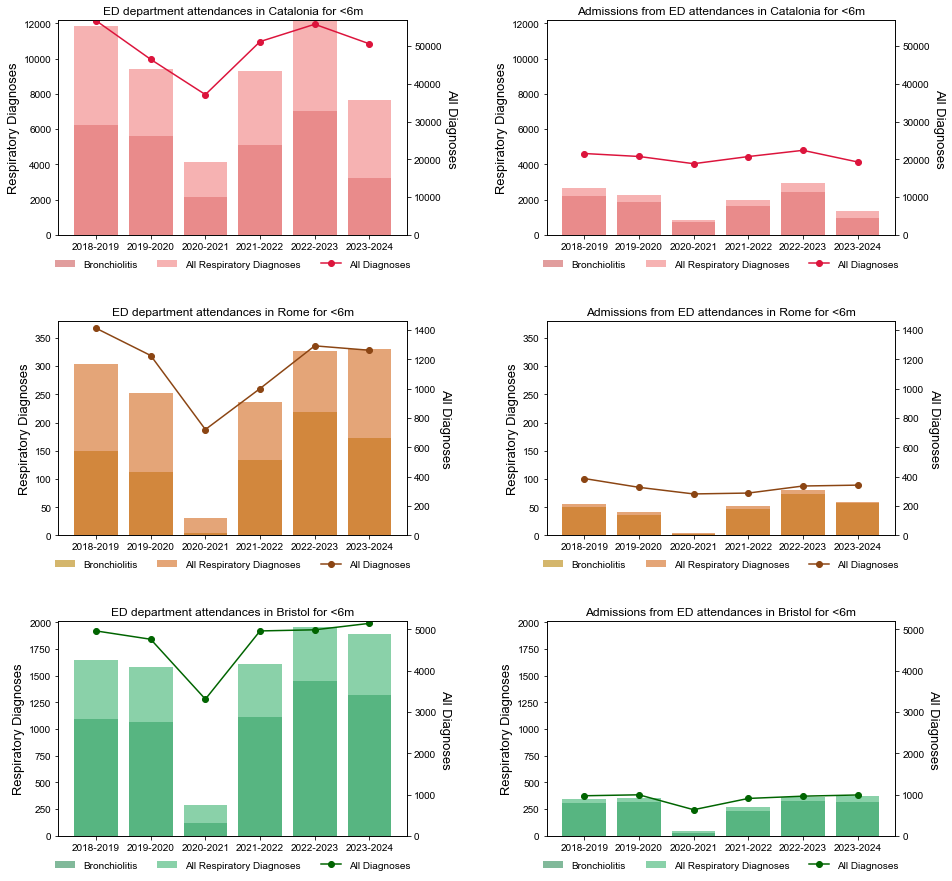

In [21]:
# Custom palettes for each region with darker shades for respiratory diagnoses
colors_by_region = {
    'Catalonia': {
        'all_diagnoses': 'crimson',         # Warm Pink
        'respiratory_diagnoses': 'lightcoral', # Darker Salmon
        'bronchiolitis_percent': 'indianred', # Orange Red
        'bronchiolitis_percent2': '#B22222' # Firebrick Red
    },
    'Rome': {
        'all_diagnoses': 'saddlebrown',         # Saddle Brown
        'respiratory_diagnoses': 'chocolate', # Sienna
        'bronchiolitis_percent': 'darkgoldenrod', # Peru
        'bronchiolitis_percent2': '#D2691E' # Chocolate
    },
    'Bristol': {
        'all_diagnoses': 'darkgreen',         # Medium Green
        'respiratory_diagnoses': 'mediumseagreen', # Darker Green
        'bronchiolitis_percent': 'seagreen', # Sea Green
        'bronchiolitis_percent2': '#006400' # Dark Green
    }
}

regions1 = attendances_ED.Place.unique()[0:3]
regions1 = np.repeat(regions1, 2)
regions2 = attendances_ED.Place.unique()[3:]
regions2 = np.repeat(regions2, 2)
# Loop through each age group to create separate figures
count = 0

age_group = "<6m"
# for df in datasets:
# Filter data for the current age group
age_group_data = attendances_ED[attendances_ED['Age-group'] == age_group].copy()
age_group_data2 = admissions_ED[admissions_ED['Age-group'] == age_group].copy()

# Create a 2x2 subplot grid for this age group without sharing y-axis
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=False)
axes = axes.flatten()

for i, (ax, region) in enumerate(zip(axes, regions1)):  
    # Check if the index is even or odd
    if i % 2 == 0:  # Even index (par)
        region_data = age_group_data[age_group_data['Place'] == region]
    else:  # Odd index (impar)
        region_data = age_group_data2[age_group_data2['Place'] == region]

    # Ensure the data is sorted by season for proper plotting
    region_data = region_data.sort_values(by='Season')
    
    # Get the color palette for the region
    region_colors = colors_by_region[region]
    
    # Plot bars for all diagnoses
    # all_diag_bars = ax.bar(region_data['Season'], region_data['All Diagnoses'], 
    #                        color=region_colors['all_diagnoses'], label='All Diagnoses', alpha=0.6)
    # Plot for bronchiolitis

    bronquis = ax.bar(region_data['Season'], region_data['Bronchiolitis'], 
                           color=region_colors['bronchiolitis_percent'], label='Bronchiolitis', alpha=0.6)
    
    # Plot contiguous bars for respiratory diagnoses
    resp_diag_bars = ax.bar(region_data['Season'], region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'], 
                            color=region_colors['respiratory_diagnoses'], label='All Respiratory Diagnoses', alpha=0.6)
    
    # Create a twin y-axis to plot the percentage of bronchiolitis
    ax2 = ax.twinx()
    # bronch_line = ax2.plot(region_data['Season'], region_data['% Bronchiolitis among all diagnoses'], 
    #                        color=region_colors['bronchiolitis_percent'], marker='o', label='% Bronchiolitis (all)', linestyle='--')
    # bronch_line2 = ax2.plot(region_data['Season'], region_data['% of Bronchiolitis among Respiratory Diagnoses'], 
    #                        color=region_colors['bronchiolitis_percent2'], marker='o', label='% Bronchiolitis (RD)', linestyle='--')

    alldiag_line = ax2.plot(region_data['Season'], region_data['All Diagnoses'], 
                            color=region_colors['all_diagnoses'], marker='o', label='All Diagnoses', linestyle = '-')
                           
    # Set labels and titles
    
    ax.set_ylabel('Respiratory Diagnoses', fontsize = 13)
    ax2.set_ylabel('All Diagnoses', fontsize = 13, rotation = 270, labelpad = 15)
    
    # Add legends directly to the subplot
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    # Combine the handles and labels
    all_handles = handles1 + handles2
    all_labels = labels1 + labels2
    
    # Create a unified legend at the bottom of the figure
    ax.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

    # if count == 0:
    #     ax2.set_ylim((0,100))
    # elif count == 1:
    #     ax2.set_ylim((0,60))
    # elif count == 2:
    #     ax2.set_ylim((0,30))
    # elif count == 3:
    #     ax2.set_ylim((0,2))
    if i % 2 == 0:  # Even index (par)
        ax.set_title(f'ED department attendances in {region} for {age_group}', fontsize = 12)
        ax.set_ylim((0,max(region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'])+50))
        ax2.set_ylim((0,max(region_data['All Diagnoses'])+50))
    else:  # Odd index (impar)
        ss = age_group_data[age_group_data['Place'] == region]
        ax.set_title(f'Admissions from ED attendances in {region} for {age_group}', fontsize = 12)
        ax.set_ylim((0,max(ss['Respiratory Diasgnoses (not including Bronchiolitis) '] + ss['Bronchiolitis'])+50))
        ax2.set_ylim((0,max(ss['All Diagnoses'])+50))
    
plt.subplots_adjust(wspace=.4, hspace=.4)
# plt.show()
# count+=1

# fig.savefig(f"Figure1A.png", dpi=600, bbox_inches='tight')


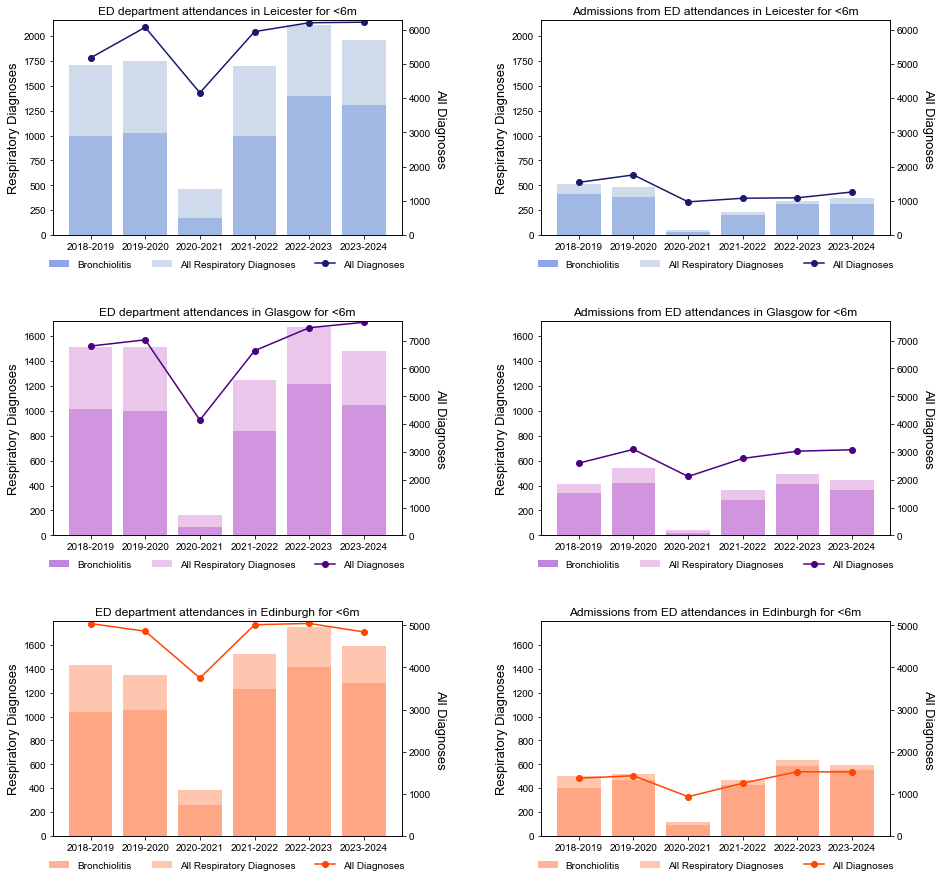

In [23]:
colors_by_region = {
    
    'Leicester': {
        'all_diagnoses': 'midnightblue',         # Light Steel Blue
        'respiratory_diagnoses': 'lightsteelblue', # Steel Blue
        'bronchiolitis_percent': 'royalblue', # Dodger Blue
        'bronchiolitis_percent2': '#104E8B' # Dark Dodger Blue
    },
    'Glasgow': {
        'all_diagnoses': 'indigo',         # Royal Purple
        'respiratory_diagnoses': 'plum', # Pure Purple
        'bronchiolitis_percent': 'darkorchid', # Medium Purple
        'bronchiolitis_percent2': '#4B0082' # Indigo
    },
    'Edinburgh': {
        'all_diagnoses': 'orangered',         # Dark Orange
        'respiratory_diagnoses': 'lightsalmon', # Coral
        'bronchiolitis_percent': 'coral', # Tomato
        'bronchiolitis_percent2': '#DC143C' # Crimson
    }
}

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=False)
axes = axes.flatten()

for i, (ax, region) in enumerate(zip(axes, regions2)):  
    # Check if the index is even or odd
    if i % 2 == 0:  # Even index (par)
        region_data = age_group_data[age_group_data['Place'] == region]
    else:  # Odd index (impar)
        region_data = age_group_data2[age_group_data2['Place'] == region]

    # Ensure the data is sorted by season for proper plotting
    region_data = region_data.sort_values(by='Season')
    
    # Get the color palette for the region
    region_colors = colors_by_region[region]
    
    # Plot bars for all diagnoses
    # all_diag_bars = ax.bar(region_data['Season'], region_data['All Diagnoses'], 
    #                        color=region_colors['all_diagnoses'], label='All Diagnoses', alpha=0.6)
    # Plot for bronchiolitis

    bronquis = ax.bar(region_data['Season'], region_data['Bronchiolitis'], 
                           color=region_colors['bronchiolitis_percent'], label='Bronchiolitis', alpha=0.6)
    
    # Plot contiguous bars for respiratory diagnoses
    resp_diag_bars = ax.bar(region_data['Season'], region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'], 
                            color=region_colors['respiratory_diagnoses'], label='All Respiratory Diagnoses', alpha=0.6)
    
    # Create a twin y-axis to plot the percentage of bronchiolitis
    ax2 = ax.twinx()
    # bronch_line = ax2.plot(region_data['Season'], region_data['% Bronchiolitis among all diagnoses'], 
    #                        color=region_colors['bronchiolitis_percent'], marker='o', label='% Bronchiolitis (all)', linestyle='--')
    # bronch_line2 = ax2.plot(region_data['Season'], region_data['% of Bronchiolitis among Respiratory Diagnoses'], 
    #                        color=region_colors['bronchiolitis_percent2'], marker='o', label='% Bronchiolitis (RD)', linestyle='--')

    alldiag_line = ax2.plot(region_data['Season'], region_data['All Diagnoses'], 
                            color=region_colors['all_diagnoses'], marker='o', label='All Diagnoses', linestyle = '-')
                           
    # Set labels and titles
    
    ax.set_ylabel('Respiratory Diagnoses', fontsize = 13)
    ax2.set_ylabel('All Diagnoses', fontsize = 13, rotation = 270, labelpad = 15)
    
    # Add legends directly to the subplot
    handles1, labels1 = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    # Combine the handles and labels
    all_handles = handles1 + handles2
    all_labels = labels1 + labels2
    
    # Create a unified legend at the bottom of the figure
    ax.legend(all_handles, all_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

    # if count == 0:
    #     ax2.set_ylim((0,100))
    # elif count == 1:
    #     ax2.set_ylim((0,60))
    # elif count == 2:
    #     ax2.set_ylim((0,30))
    # elif count == 3:
    #     ax2.set_ylim((0,2))
    if i % 2 == 0:  # Even index (par)
        ax.set_title(f'ED department attendances in {region} for {age_group}', fontsize = 12)
        ax.set_ylim((0,max(region_data['Respiratory Diasgnoses (not including Bronchiolitis) '] + region_data['Bronchiolitis'])+50))
        ax2.set_ylim((0,max(region_data['All Diagnoses'])+50))
    else:  # Odd index (impar)
        ss = age_group_data[age_group_data['Place'] == region]
        ax.set_title(f'Admissions from ED attendances in {region} for {age_group}', fontsize = 12)
        ax.set_ylim((0,max(ss['Respiratory Diasgnoses (not including Bronchiolitis) '] + ss['Bronchiolitis'])+50))
        ax2.set_ylim((0,max(ss['All Diagnoses'])+50))
    
plt.subplots_adjust(wspace=.4, hspace=.4)
# plt.show()
# count+=1

# fig.savefig(f"Figure1B.png", dpi=600, bbox_inches='tight')


In [ ]:
# admissions_ED.to_excel("admissionsED.xlsx")

In [ ]:
# attendances_ED.to_excel("attendancesED.xlsx")

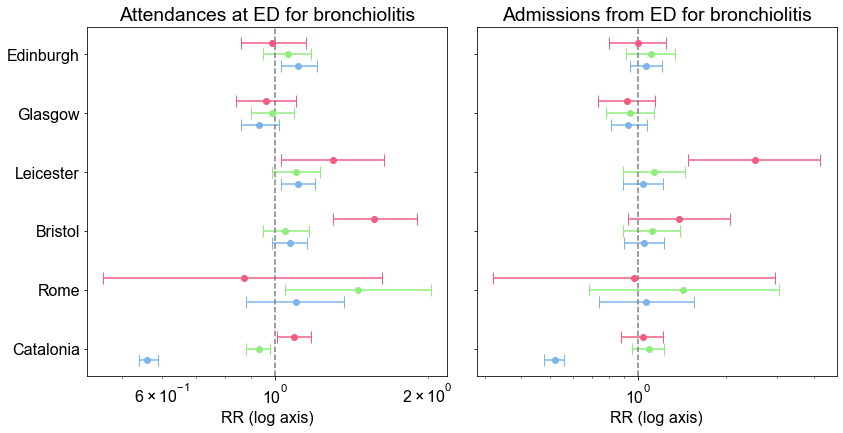

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Attendances
locations = ['Catalonia', 'Rome', 'Bristol', 'Leicester', 'Glasgow', 'Edinburgh']
age_groups = ['<6m', '6-11m', '12-23m']
colors = ['#7CB5EC', '#90ED7D', '#F15C80']

attendances_rr = np.array([
    [0.56, 0.93, 1.09],
    [1.10, 1.46, 0.87],
    [1.07, 1.05, 1.57],
    [1.11, 1.10, 1.30],
    [0.93, 0.99, 0.96],
    [1.11, 1.06, 0.99]
])

attendances_ci = np.array([
    [[0.54, 0.59], [0.88, 0.98], [1.01, 1.18]],
    [[0.88, 1.37], [1.05, 2.03], [0.46, 1.63]],
    [[0.99, 1.16], [0.95, 1.17], [1.30, 1.91]],
    [[1.03, 1.20], [0.99, 1.23], [1.03, 1.64]],
    [[0.86, 1.02], [0.90, 1.09], [0.84, 1.10]],
    [[1.03, 1.21], [0.95, 1.18], [0.86, 1.15]]
])

# Data for Admissions
admissions_rr = np.array([
    [0.52, 1.09, 1.04],
    [1.07, 1.43, 0.97],
    [1.05, 1.12, 1.39],
    [1.04, 1.14, 2.51],
    [0.93, 0.94, 0.92],
    [1.07, 1.11, 1.00]
])

admissions_ci = np.array([
    [[0.48, 0.56], [0.96, 1.23], [0.88, 1.22]],
    [[0.74, 1.56], [0.68, 3.04], [0.32, 2.94]],
    [[0.90, 1.23], [0.89, 1.40], [0.93, 2.07]],
    [[0.89, 1.22], [0.89, 1.45], [1.49, 4.21]],
    [[0.81, 1.08], [0.78, 1.14], [0.73, 1.15]],
    [[0.94, 1.21], [0.91, 1.34], [0.80, 1.25]]
])

# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(12, 7), sharey=True)
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = 16
def plot_forest(ax, rr, ci, title):
    y_positions = np.arange(len(locations))
    for i, age in enumerate(age_groups):
        ax.errorbar(rr[:, i], y_positions + 0.2 * (i - 1), 
                    xerr=[rr[:, i] - ci[:, i, 0], ci[:, i, 1] - rr[:, i]], 
                    fmt='o', color=colors[i], label=age, capsize=6)
    
    ax.axvline(1, color='grey', linestyle='--')
    ax.set_yticks(y_positions)
    ax.set_yticklabels(locations, fontsize = 16)
    ax.set_xlabel("RR (log axis)", fontsize = 16)
    ax.set_xscale('log')
    ax.set_title(title)
    ax.grid(False)

# Attendances
plot_forest(axs[0], attendances_rr, attendances_ci, "Attendances at ED for bronchiolitis")

# Admissions
plot_forest(axs[1], admissions_rr, admissions_ci, "Admissions from ED for bronchiolitis")

# General layout
# fig.legend(age_groups, loc='lower center', ncol=3, frameon=False, fontsize='large')
fig.tight_layout(rect=[0, 0.1, 1, 1])
fig.savefig("RR_plot.png", dpi = 600, bbox_inches = "tight")